## 데이터마다의 분석 아이디어를 기록해두겠습니다!

1. '../DATA/elec_data.csv' : 경북대학교 전력 사용량 데이터
2. '../DATA/gas_data.csv' : 경북대학교 가스 사용량 데이터
3. '../DATA/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv' : 전국 태양광 및 풍력 발전량 데이터

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. elec_data.csv

In [51]:
# 1. Load the data
data_elec = pd.read_csv('../DATA/elec_data.csv')
data_elec.tail(10)

,useYm,useQty
138,202305,129896.0
139,202306,140844.0
140,202307,164994.0
141,202308,167263.0
142,202309,182880.0
143,202310,175957.0
144,202311,130124.0
145,202312,149871.0
146,202401,172577.0
147,202402,141258.0


In [52]:
data_elec.describe()

,useYm,useQty
count,148.000000,148.000000
mean,201715.797297,50533.770270
std,391.708068,69484.844902
min,201101.000000,1.000000
25%,201401.750000,422.250000
50%,201710.500000,4774.000000
75%,202101.250000,129953.000000
max,202402.000000,191391.000000


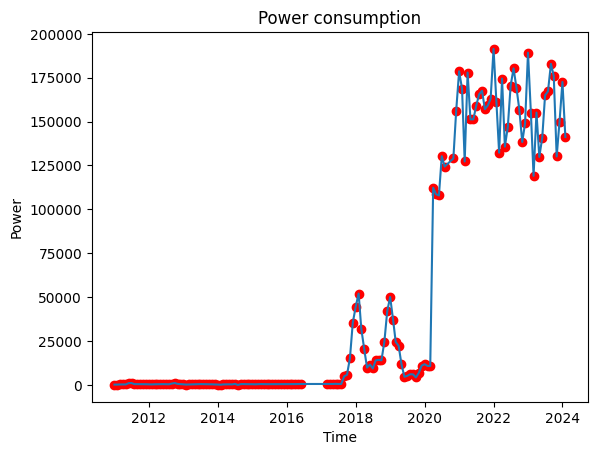

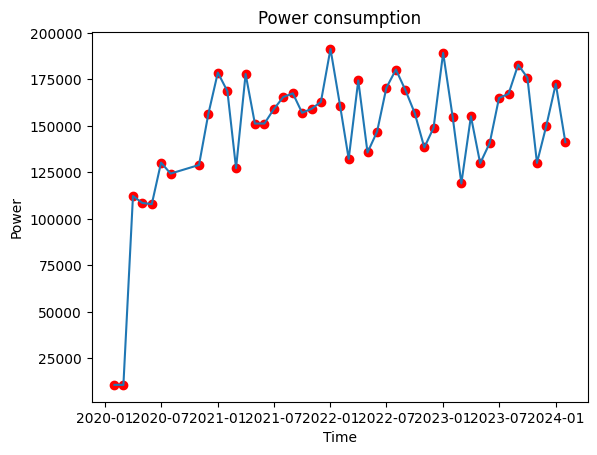

,useYm,useQty
101,2020-02-01,10808.0
102,2020-03-01,10774.0
103,2020-04-01,112331.0
104,2020-05-01,108627.0
105,2020-06-01,107926.0


In [53]:
# useYm -> datetime format
data_elec['useYm'] = pd.to_datetime(data_elec['useYm'], format='%Y%m')

plt.plot(data_elec['useYm'], data_elec['useQty'])
plt.scatter(data_elec['useYm'], data_elec['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power consumption')
plt.show()

# over 2020-01
data_elec = data_elec[data_elec['useYm'] > '2020-01']
plt.plot(data_elec['useYm'], data_elec['useQty'])
plt.scatter(data_elec['useYm'], data_elec['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power consumption')
plt.show()
data_elec.head()

1월 전력 총 사용량: 731877.0
평균 : 182969.25, 표준편차 : 8886.48, 최대 : 191391.0, 최소 : 172577.0
2월 전력 총 사용량: 625536.0
평균 : 156384.00, 표준편차 : 11588.14, 최대 : 168657.0, 최소 : 141258.0
3월 전력 총 사용량: 378663.0
평균 : 126221.00, 표준편차 : 6663.40, 최대 : 132289.0, 최소 : 119090.0
4월 전력 총 사용량: 507488.0
평균 : 169162.67, 표준편차 : 12281.04, 최대 : 177906.0, 최소 : 155122.0
5월 전력 총 사용량: 525509.0
평균 : 131377.25, 표준편차 : 17645.55, 최대 : 151263.0, 최소 : 108627.0
6월 전력 총 사용량: 546974.0
평균 : 136743.50, 표준편차 : 19682.46, 최대 : 151278.0, 최소 : 107926.0
7월 전력 총 사용량: 624674.0
평균 : 156168.50, 표준편차 : 17896.00, 최대 : 170461.0, 최소 : 130267.0
8월 전력 총 사용량: 637459.0
평균 : 159364.75, 표준편차 : 24232.34, 최대 : 180289.0, 최소 : 124386.0
9월 전력 총 사용량: 519555.0
평균 : 173185.00, 표준편차 : 8435.43, 최대 : 182880.0, 최소 : 167524.0
10월 전력 총 사용량: 489875.0
평균 : 163291.67, 표준편차 : 10968.94, 최대 : 175957.0, 최소 : 156861.0
11월 전력 총 사용량: 556739.0
평균 : 139184.75, 표준편차 : 13988.58, 최대 : 159203.0, 최소 : 129006.0
12월 전력 총 사용량: 618078.0
평균 : 154519.50, 표준편차 : 6491.31, 최대 : 162964.0, 최소 : 14

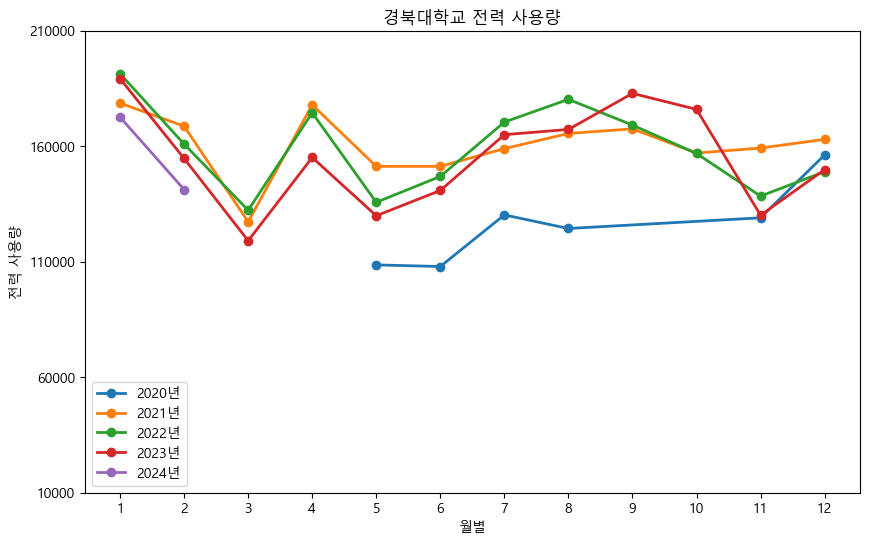

In [77]:
# 2020.04 부터 사용
data_elec = data_elec[data_elec['useYm'] > '2020-04']

# 월별 전력 사용량
data_elec['Month'] = data_elec['useYm'].dt.month
data_elec['Year'] = data_elec['useYm'].dt.year

# Monthly power consumption
for i in range(1, 13):
    print(f'{i}월 전력 총 사용량: {data_elec[data_elec["Month"] == i]["useQty"].sum()}')
    print(f'평균 : {data_elec[data_elec["Month"] == i]["useQty"].mean():.2f}, 표준편차 : {data_elec[data_elec["Month"] == i]["useQty"].std():.2f}, 최대 : {data_elec[data_elec["Month"] == i]["useQty"].max()}, 최소 : {data_elec[data_elec["Month"] == i]["useQty"].min()}')
    
# plots
# Korean font
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(10, 6))
for i in range(2020, 2025):
    plt.plot(data_elec[data_elec['Year'] == i].groupby('Month')['useQty'].sum(), label=f'{i}년', marker='o', linestyle='-', linewidth=2)
plt.xlabel('월별')
plt.xticks(np.arange(1, 13))
plt.ylabel('전력 사용량')
plt.yticks(np.arange(10000, 250000, 50000))
plt.title('경북대학교 전력 사용량')
plt.legend()
plt.show()

### 간단 분석
- 2020년대부터 10만kWh 이상의 전력 사용량 : 여기서부터 유효하다 보면 좋을 듯!

### 분석 아이디어
- 계절성을 띠네요
- 경북대 전력 사용량 추세 : 증가? 일정?  
    -> 일정하다 : 예전 자료로 전기요금 예측  
    -> 증가한다 : 경북대의 전력 사용량이 증가하는 이유 분석, 미래 전력 사용량 예측

### 분석 결과
- 전력 사용량은 일정한 계절성을 띤다 : 연도별 유사한 패턴을 보인다
- 여름과 겨울이 높은데, 3월은 유난히 낮고 4월은 유난히 높다 (공부 안하고 놀러 나가서 그런가)

## 2. gas_data.csv

In [55]:
# load data
data_gas = pd.read_csv('../DATA/gas_data.csv')
data_gas['useYm'] = pd.to_datetime(data_gas['useYm'], format='%Y%m')
data_gas

,useYm,useQty
0,2011-01-01,9168269.0
1,2011-02-01,7072076.0
2,2011-03-01,5656101.0
3,2011-04-01,4096409.0
4,2011-05-01,1862692.0
...,...,...
150,2023-10-01,1214706.0
151,2023-11-01,1440307.0
152,2023-12-01,3956066.0
153,2024-01-01,3910183.0


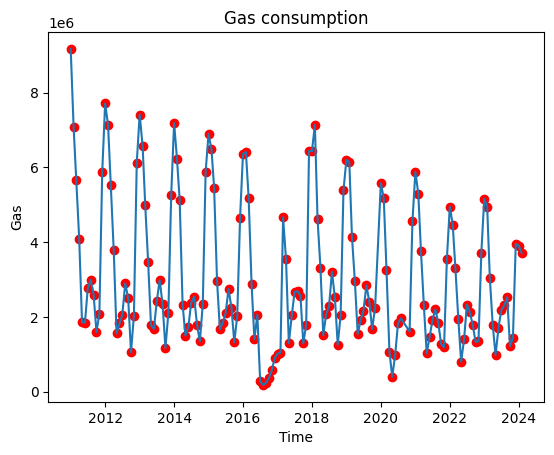

In [56]:
# plot data
plt.plot(data_gas['useYm'], data_gas['useQty'])
plt.scatter(data_gas['useYm'], data_gas['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Gas')
plt.title('Gas consumption')
plt.show()

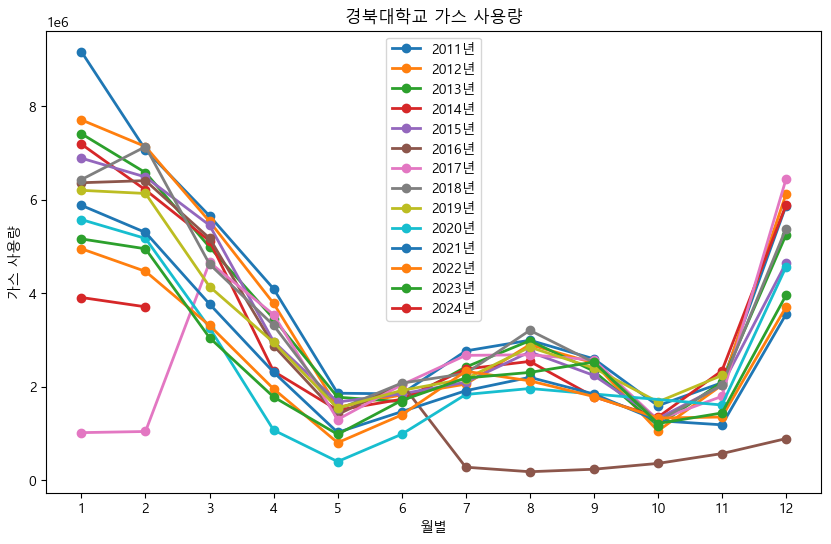

In [78]:
# 월별 가스 사용량
data_gas['Month'] = data_gas['useYm'].dt.month
data_gas['Year'] = data_gas['useYm'].dt.year

# plots
plt.figure(figsize=(10, 6))
for i in range(2011, 2025):
    plt.plot(data_gas[data_gas['Year'] == i].groupby('Month')['useQty'].sum(), label=f'{i}년', marker='o', linestyle='-', linewidth=2)
plt.xlabel('월별')
plt.xticks(np.arange(1, 13))
plt.ylabel('가스 사용량')
plt.title('경북대학교 가스 사용량')
plt.legend()
plt.show()

#### 분석 아이디어
- 가스 사용이 정확히 어딘진 모르겠지만, 난방으로 추정 (발전기는 없으니께)
- 제외해도 된다고 생각!

## 3. 한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv

In [57]:
# 1. Load the data
data_prod = pd.read_csv('../DATA/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv', encoding='cp949')
data_prod

,거래일자,거래시간,지역명,태양광발전량(Mwh),풍력발전량(Mwh)
0,2023-09-01,1,경기도,0.029757,0.0
1,2023-09-01,2,경기도,0.000000,0.0
2,2023-09-01,3,경기도,0.000000,0.0
3,2023-09-01,4,경기도,0.000000,0.0
4,2023-09-01,5,경기도,0.000000,0.0
...,...,...,...,...,...
37123,2023-11-30,20,부산시,3.121764,0.0
37124,2023-11-30,21,부산시,2.427456,0.0
37125,2023-11-30,22,부산시,0.612640,0.0
37126,2023-11-30,23,부산시,0.070920,0.0


In [79]:
data_prod.describe()

,거래시간,태양광발전량(Mwh),풍력발전량(Mwh)
count,37128.00000,37128.000000,24024.000000
mean,12.50000,65.784046,34.365703
std,6.92228,166.805086,68.630351
min,1.00000,0.000000,0.000000
25%,6.75000,0.002160,0.000000
50%,12.50000,3.789978,1.939995
75%,18.25000,39.825684,31.250607
max,24.00000,1824.404856,405.596649


In [58]:
# 지역명 == '대구시'
data_elec_daegu = data_prod[data_prod['지역명'] == '대구시']
data_elec_daegu

,거래일자,거래시간,지역명,태양광발전량(Mwh),풍력발전량(Mwh)
312,2023-09-01,1,대구시,0.000000,NaN
313,2023-09-01,2,대구시,0.000000,NaN
314,2023-09-01,3,대구시,0.000000,NaN
315,2023-09-01,4,대구시,0.000000,NaN
316,2023-09-01,5,대구시,0.000000,NaN
...,...,...,...,...,...
37051,2023-11-30,20,대구시,1.944088,NaN
37052,2023-11-30,21,대구시,0.967288,NaN
37053,2023-11-30,22,대구시,0.157388,NaN
37054,2023-11-30,23,대구시,0.000000,NaN


In [80]:
# NaN?
data_prod.describe()    # 원래 NaN이 많구나

,거래시간,태양광발전량(Mwh),풍력발전량(Mwh)
count,37128.00000,37128.000000,24024.000000
mean,12.50000,65.784046,34.365703
std,6.92228,166.805086,68.630351
min,1.00000,0.000000,0.000000
25%,6.75000,0.002160,0.000000
50%,12.50000,3.789978,1.939995
75%,18.25000,39.825684,31.250607
max,24.00000,1824.404856,405.596649


In [60]:
data_elec_daegu.fillna(0, inplace=True)
data_elec_daegu.describe()

C:\Users\HOME\AppData\Local\Temp\ipykernel_18956\3048040535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_elec_daegu.fillna(0, inplace=True)


,거래시간,태양광발전량(Mwh),풍력발전량(Mwh)
count,2184.000000,2184.000000,2184.0
mean,12.500000,8.184702,0.0
std,6.923772,11.598424,0.0
min,1.000000,0.000000,0.0
25%,6.750000,0.000000,0.0
50%,12.500000,1.437090,0.0
75%,18.250000,14.109202,0.0
max,24.000000,40.891275,0.0


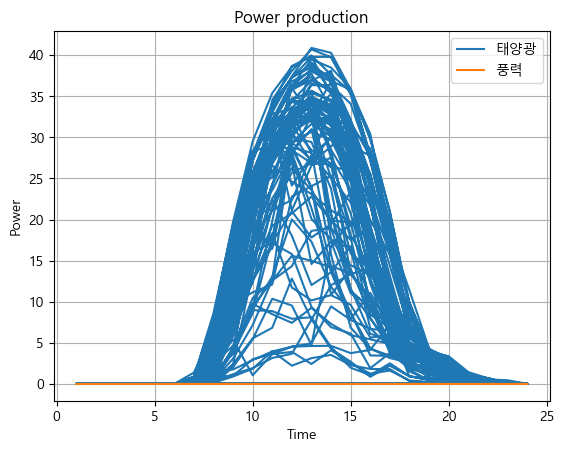

In [84]:
# plot
plt.plot(data_elec_daegu['거래시간'], data_elec_daegu['태양광발전량(Mwh)'])
plt.plot(data_elec_daegu['거래시간'], data_elec_daegu['풍력발전량(Mwh)'])
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power production')
plt.grid(True)
plt.legend(['태양광', '풍력'])
plt.show()

In [86]:
# Max인 13시의 description
data_elec_daegu[data_elec_daegu['거래시간'] == 13].describe()

# 평균 28, 범위 2.4 ~ 40.8


,거래시간,태양광발전량(Mwh),풍력발전량(Mwh)
count,91.0,91.000000,91.0
mean,13.0,28.390436,0.0
std,0.0,10.222237,0.0
min,13.0,2.429787,0.0
25%,13.0,23.904752,0.0
50%,13.0,32.587726,0.0
75%,13.0,34.833727,0.0
max,13.0,40.891275,0.0


#### 분석 아이디어
-  대구 태양광 발전량 -> 경북대 태양광 공급량 가능량 추정 (연도별, 시간대별 발전량은 이렇고, 경북대엔 충분히 공급가능할 것이다!)

## 4. 공장 전력 사용량 - KT 빅데이터 플랫폼

## 5. 아파트 전력 사용량 - KT 빅데이터 플랫폼